# SPAM DETECTION USING NLP

# SMS Spam Collection Data Set

## Data Set Information:

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


## Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.

# IMPORTING REQUIRED LIBRARIES AND LOADING CSV FILE

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as se

In [3]:
msg = pd.read_csv("Data/SMSSpamCollection",sep="\t",names=["Type","Message"])
msg.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EXPLORATORY DATA ANALYSIS

In [4]:
msg.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
msg.shape

(5572, 2)

### There are total 5572 messages in which some are ham and some are spam

In [6]:
msg["Type"].value_counts()

ham     4825
spam     747
Name: Type, dtype: int64

### We observe that out of 5572 messages 4825 are ham and 747 are spam.

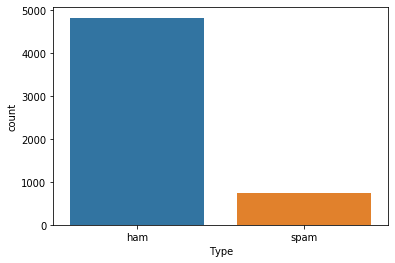

In [7]:
se.countplot(x="Type",data=msg)

### From graph we can say that very less messages recieved are spam

#### Now to create a word cloud for spams

In [8]:
from wordcloud import WordCloud,STOPWORDS 

In [9]:
msg_spam = msg.loc[msg['Type']=='spam', :]
msg_spam.head()

,Type,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
msg_spam['Type'].value_counts()

spam    747
Name: Type, dtype: int64

In [11]:
msg_spam = msg.loc[msg['Type'] == 'spam', :]

spam_words = ' '.join(msg_spam['Message'])

clean_spam_word = " ".join([word for word in spam_words.split()])

In [12]:
spam_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=900
                     ).generate(clean_spam_word)

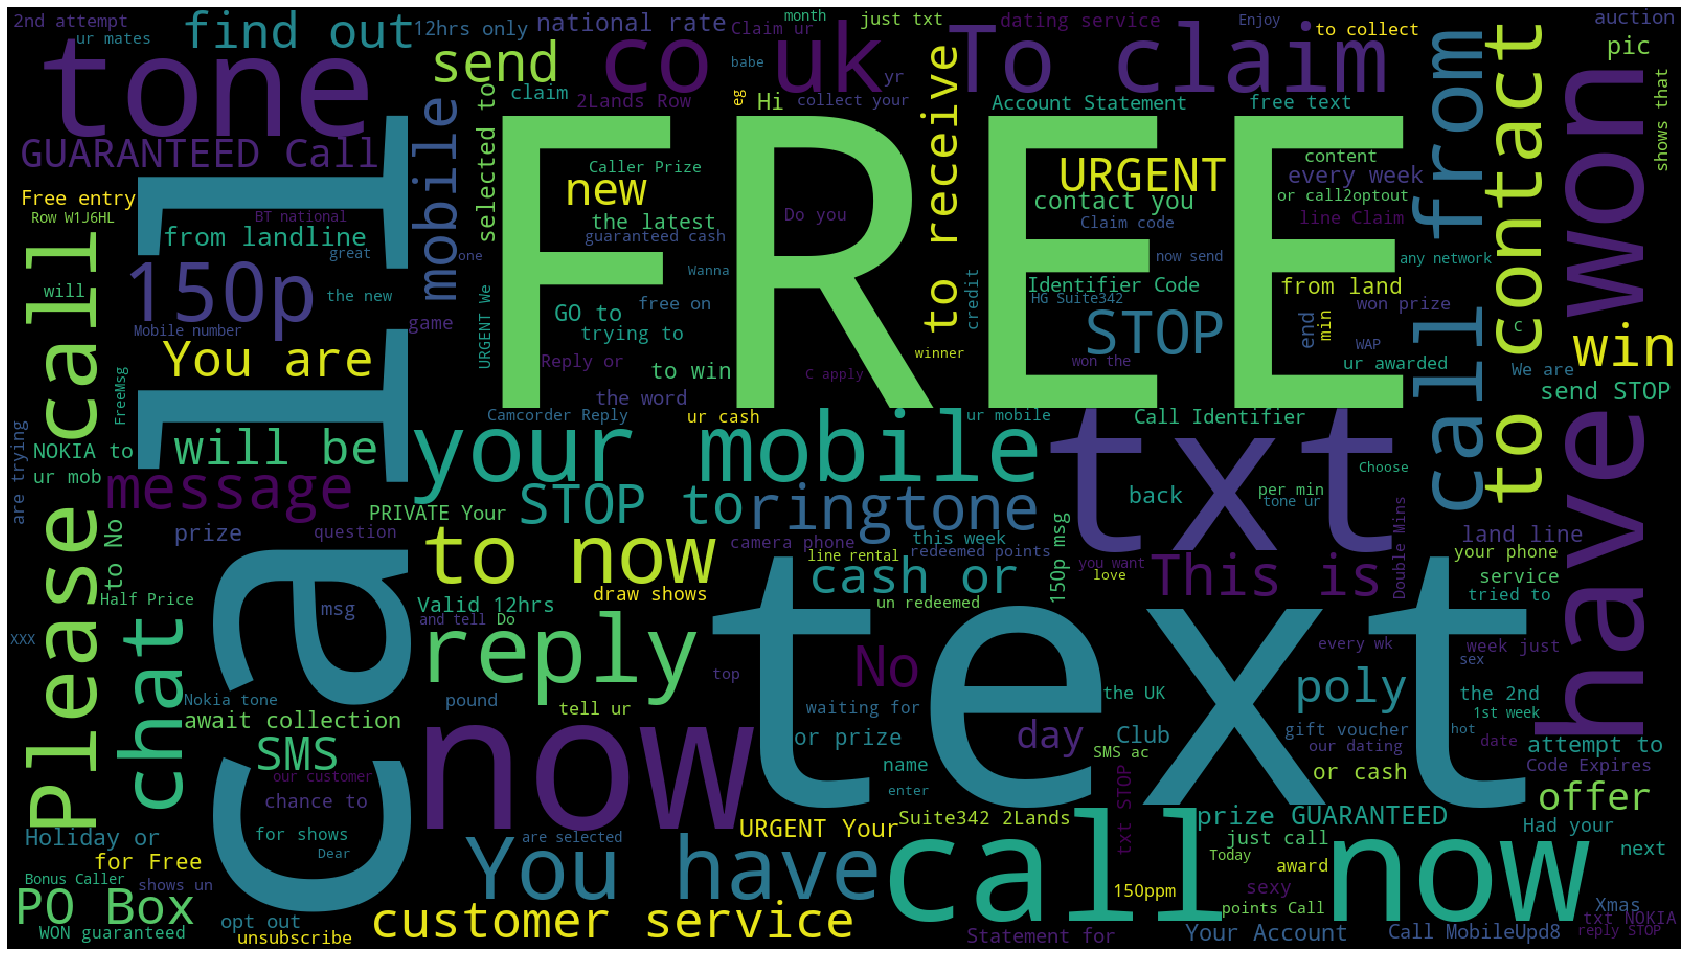

In [13]:
mlt.figure(1,figsize=(30,30))
mlt.imshow(spam_wordcloud)
mlt.axis('off')
mlt.show()

### From the above picture we can say that spam messages comprise of words like free,text,call now etc.

# DATA PREPROCESSING

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [15]:
# Initialising Lemmatizer
spam_lemma = WordNetLemmatizer()

In [16]:
clean_spam = []
spam_len = []

In [17]:
def preprocess(spam_in):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",spam_in)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Lemmatization
    words = [spam_lemma.lemmatize(word) for word in words]
    
    clean_spam.append(" ".join(words))
    
    spam_len.append(len(words))

In [18]:
msg["Type Value"] = msg["Type"].apply(lambda x: 0 if x == "spam" else 1)

In [19]:
clean_spam = []
spam_len = []
msg['Message'].apply(lambda x: preprocess(x))
msg['Clean Spam'] = clean_spam
msg['Spam Length'] = spam_len

In [20]:
msg.head()

,Type,Message,Type Value,Clean Spam,Spam Length
0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,1,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,1,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah think go usf life around though,7


# DATA PREPARATION

In [21]:
# Target variable preparation
msg['Type Value']=msg['Type'].apply(lambda x: 0 if x=='spam' else 1)
msg.head()

,Type,Message,Type Value,Clean Spam,Spam Length
0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,1,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,1,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah think go usf life around though,7


In [37]:
# splitting data into test and train
from sklearn.model_selection  import train_test_split
spam_train, spam_test = train_test_split(msg,test_size=0.2,random_state=42)

In [38]:
train_clean_spam=[]
for spam in spam_train['Clean Spam']:
    train_clean_spam.append(spam)

test_clean_spam=[]
for spam in spam_test['Clean Spam']:
    test_clean_spam.append(spam)

In [45]:
# Converting text to numerical vectors using Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer
spam_vector = CountVectorizer(analyzer = "word")
spam_train_features = spam_vector.fit_transform(train_clean_spam)
spam_test_features = spam_vector.transform(test_clean_spam)

In [46]:
spam_vector.vocabulary_

{'reply': 4463,
 'win': 6061,
 'weekly': 5997,
 'fifa': 1873,
 'world': 6134,
 'cup': 1228,
 'held': 2383,
 'send': 4727,
 'stop': 5170,
 'end': 1654,
 'service': 4746,
 'hello': 2387,
 'sort': 5024,
 'town': 5603,
 'already': 163,
 'dont': 1496,
 'rush': 4583,
 'home': 2445,
 'eating': 1594,
 'nacho': 3523,
 'let': 3004,
 'know': 2891,
 'eta': 1709,
 'come': 1041,
 'guoyang': 2289,
 'go': 2182,
 'tell': 5391,
 'told': 5554,
 'hey': 2401,
 'sathya': 4637,
 'till': 5514,
 'dint': 1433,
 'meet': 3293,
 'even': 1720,
 'single': 4883,
 'time': 5515,
 'saw': 4649,
 'situation': 4896,
 'orange': 3786,
 'brings': 691,
 'ringtones': 4532,
 'chart': 887,
 'hero': 2398,
 'free': 2016,
 'hit': 2416,
 'week': 5995,
 'pic': 3986,
 'wap': 5942,
 'receiving': 4384,
 'tip': 5518,
 'sitting': 4895,
 'mu': 3482,
 'waiting': 5920,
 'everyone': 1729,
 'get': 2139,
 'suite': 5248,
 'take': 5337,
 'shower': 4835,
 'finish': 1897,
 'liao': 3008,
 'urgent': 5789,
 'mobile': 3404,
 'awarded': 398,
 'bonus': 62

In [47]:
print("Unique spam words: ", len(spam_vector.vocabulary_))
print("Type of spam train features: ", type(spam_train_features))
print("Shape spam train data: ", spam_train_features.shape)

Unique spam words:  6278
Type of spam train features:  <class 'scipy.sparse.csr.csr_matrix'>
Shape spam train data:  (4457, 6278)


# MODELLING

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
# Creating a list of objects which comprise of 3 models namely Logistic Reg, Decision Tree and SVM
models = [LogisticRegression(),DecisionTreeClassifier(),SVC()]

In [50]:
%%time
spam_features = spam_train_features.toarray()
spam_test = spam_test_features.toarray()
for model in models:
    spam_fit = model.fit(spam_features,spam_train['Type Value'])
    spam_pred = spam_fit.predict(spam_test)

Wall time: 1min 19s


In [51]:
spam_features = spam_train_features.toarray()
spam_test = spam_test_features.toarray()

In [55]:
l=[]
spam_score = []
for model in models:
    spam_fit = model.fit(spam_features,spam_train['Type Value'])
    spam_pred = spam_fit.predict(spam_test)
    accuracy = accuracy_score(spam_pred,spam_test['Type Value'])
    l.append(accuracy_score(spam_pred,spam_test['Type Value']))
    l.append(confusion_matrix(spam_pred,spam_test['Type Value']))
    l.append(classification_report(spam_pred,spam_test['Type Value']))
    spam_score.append(l)
    spam_accuracy = accuracy_score(spam_test['Type Value'],spam_pred)
    print('Accuracy of '+model.__class__.__name__+' is '+str(spam_accuracy))
    print('*'*100)
    print("\n Confusion matrix:- ")
    print(confusion_matrix(spam_test['Type Value'],spam_pred))
    print('*'*100)
    print("\n Classification report:- ")
    print(classification_report(spam_test['Type Value'],spam_pred))
    print('\n')
    print('*'*100)
    print('\n')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices